In [3]:
#Shishir Khanal
#July 11, 2025
#Prophet library

In [45]:
import pandas as pd
import numpy as np
from prophet import Prophet
%matplotlib inline

In [46]:
df = pd.read_csv('BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [48]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [49]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [50]:
m = Prophet()
m.fit(df)

17:36:00 - cmdstanpy - INFO - Chain [1] start processing
17:36:00 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
#Create a placeholder to hold future predictions
#Prophet expects by default daily data
future = m.make_future_dataframe(periods=24,freq='MS')
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [52]:
#columns of ds extended by 2 yrs
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [53]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [54]:
len(df)

324

In [55]:
len(future)

348

In [56]:
forecast = m.predict(future)

In [57]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.579900,1152.561534,1473.780227,1772.579900,1772.579900,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,0.0,0.0,0.0,1310.862082
1,1992-02-01,1775.428361,1184.405369,1495.547693,1775.428361,1775.428361,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,0.0,0.0,0.0,1348.415300
2,1992-03-01,1778.093050,1448.119279,1767.533660,1778.093050,1778.093050,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,0.0,0.0,0.0,1599.258278
3,1992-04-01,1780.941512,1415.226478,1741.419005,1780.941512,1780.941512,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,0.0,0.0,0.0,1584.828874
4,1992-05-01,1783.698087,1674.616168,2002.878137,1783.698087,1783.698087,45.042535,45.042535,45.042535,45.042535,45.042535,45.042535,0.0,0.0,0.0,1828.740622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5203.509436,5078.877036,5408.129381,5191.482830,5217.907751,39.822115,39.822115,39.822115,39.822115,39.822115,39.822115,0.0,0.0,0.0,5243.331550
344,2020-09-01,5219.622856,4915.227072,5244.945769,5206.656617,5235.157535,-133.358699,-133.358699,-133.358699,-133.358699,-133.358699,-133.358699,0.0,0.0,0.0,5086.264157
345,2020-10-01,5235.216488,5018.114035,5351.440280,5221.150495,5252.010849,-43.472269,-43.472269,-43.472269,-43.472269,-43.472269,-43.472269,0.0,0.0,0.0,5191.744219
346,2020-11-01,5251.329908,5178.002879,5508.230072,5236.363242,5269.014533,87.385241,87.385241,87.385241,87.385241,87.385241,87.385241,0.0,0.0,0.0,5338.715149


In [58]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [59]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4468.839402,4793.204815,4631.076827
337,2020-02-01,4510.666163,4849.711099,4681.895004
338,2020-03-01,4776.482723,5108.100085,4945.147137
339,2020-04-01,4789.329875,5117.555747,4943.982693
340,2020-05-01,5041.708564,5356.981522,5200.731498
341,2020-06-01,5024.803093,5343.846904,5181.487489
342,2020-07-01,5146.448950,5471.301790,5313.859446
343,2020-08-01,5078.877036,5408.129381,5243.331550
344,2020-09-01,4915.227072,5244.945769,5086.264157
345,2020-10-01,5018.114035,5351.440280,5191.744219


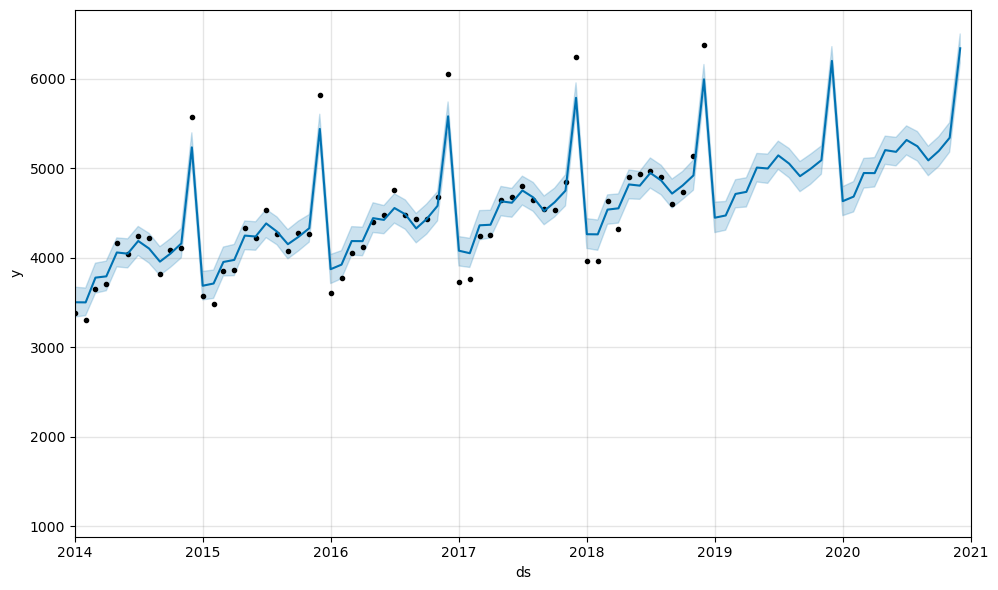

In [86]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2021-01-01')
plt.show()

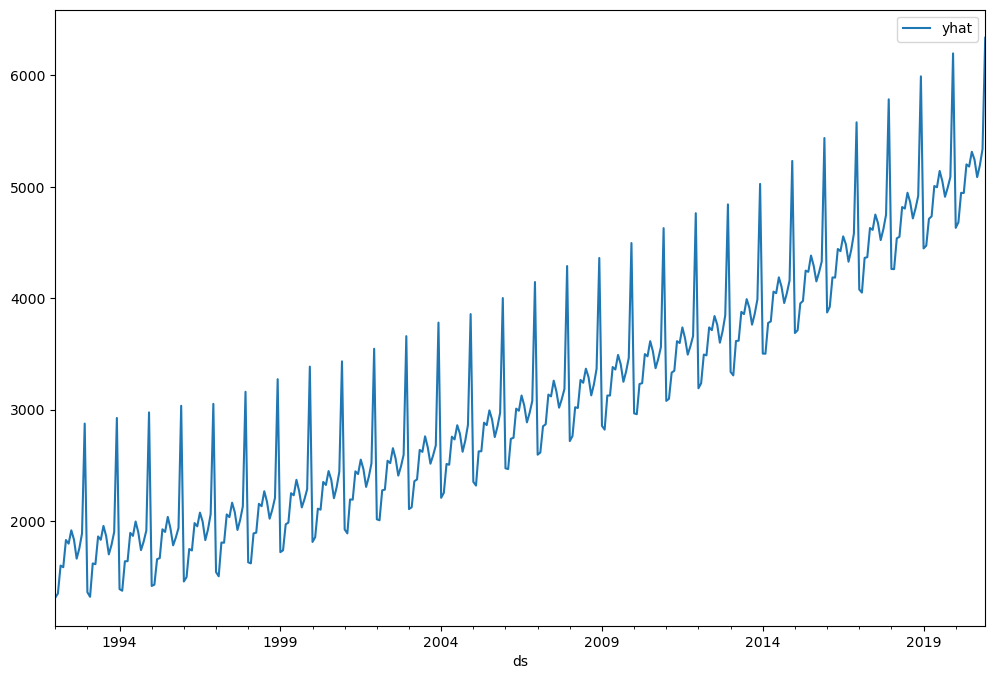

In [90]:
forecast.plot(x='ds',y='yhat',figsize=(12,8))
plt.show()

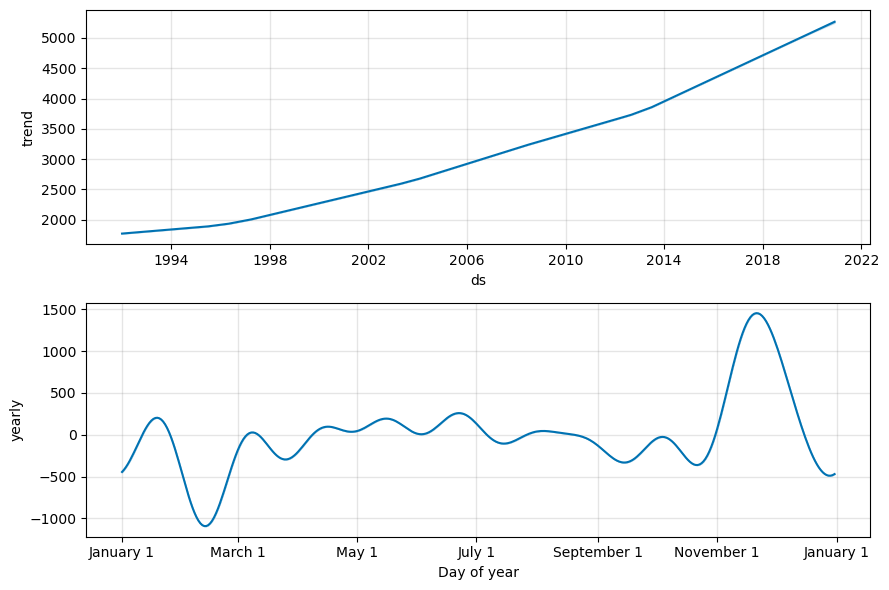

In [91]:
m.plot_components(forecast)

In [92]:
#####################################################
#Prophet Evaluation
#####################################################

In [96]:
df = pd.read_csv('Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      588 non-null    object 
 1   y       588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [100]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

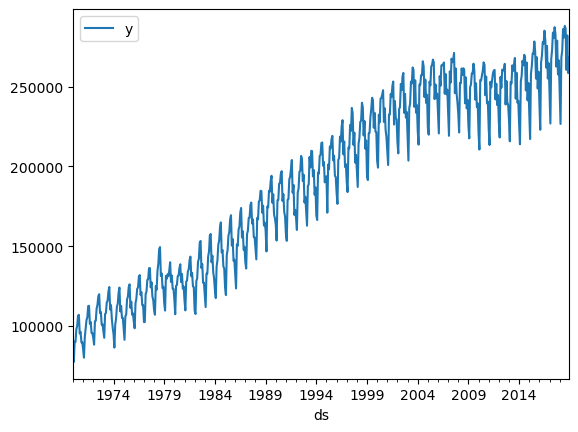

In [103]:
df.plot(x='ds',y='y')
plt.show();

In [104]:
len(df)

588

In [105]:
train = df.iloc[:576]
test = df.iloc[576:]

In [108]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

18:03:54 - cmdstanpy - INFO - Chain [1] start processing
18:03:54 - cmdstanpy - INFO - Chain [1] done processing


In [109]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263395.018116,274152.187936,285623.441012,263342.122871,263461.016806,16427.507412,16427.507412,16427.507412,16427.507412,16427.507412,16427.507412,0.0,0.0,0.0,279822.525528
584,2018-09-01,263536.322381,256366.186351,267951.148437,263446.499313,263633.890068,-1690.893599,-1690.893599,-1690.893599,-1690.893599,-1690.893599,-1690.893599,0.0,0.0,0.0,261845.428781
585,2018-10-01,263673.068444,263568.298382,274814.948848,263551.659070,263802.926087,5277.378352,5277.378352,5277.378352,5277.378352,5277.378352,5277.378352,0.0,0.0,0.0,268950.446795
586,2018-11-01,263814.372709,249797.424985,260984.691431,263653.873330,263996.982663,-8237.228440,-8237.228440,-8237.228440,-8237.228440,-8237.228440,-8237.228440,0.0,0.0,0.0,255577.144268
587,2018-12-01,263951.118771,251631.728129,262268.641968,263752.567278,264165.686266,-6942.342688,-6942.342688,-6942.342688,-6942.342688,-6942.342688,-6942.342688,0.0,0.0,0.0,257008.776083


In [110]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

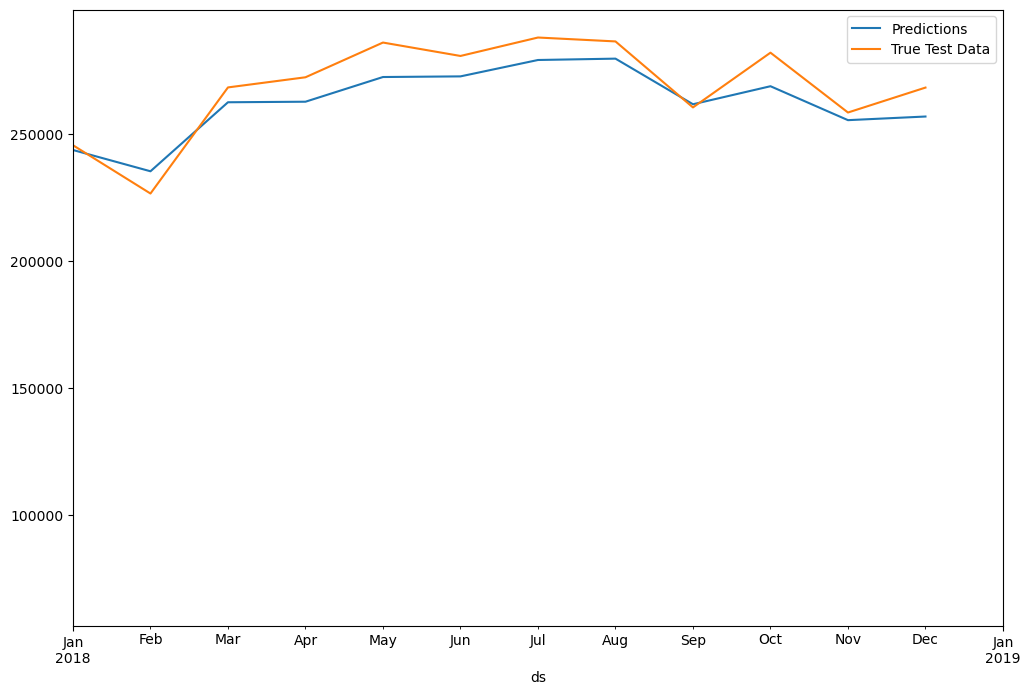

In [115]:
ax = forecast.plot(x='ds', y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))
plt.show()

In [116]:
from statsmodels.tools.eval_measures import rmse

In [118]:
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243811.934625
577    235429.331975
578    262630.368025
579    262844.366086
580    272577.940309
581    272829.337204
582    279287.096304
583    279822.525528
584    261845.428781
585    268950.446795
586    255577.144268
587    257008.776083
Name: yhat, dtype: float64

In [119]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [120]:
rmse(predictions, test['y'])

8644.964780756163

In [122]:
test['y'].mean()

268739.6666666667

In [126]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [128]:
#Initial
initial = 5 * 365
initial = str(initial) + ' days'

#Period
period = 5 * 365
period = str(period) + ' days'

#Horizon
horizon = 365
horizon = str(horizon) + ' days'

In [129]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

  0%|          | 0/9 [00:00<?, ?it/s]

18:15:37 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:38 - cmdstanpy - INFO - Chain [1] done processing
18:15:38 - cmdstanpy - INFO - Chain [1] start processing
18:15:39 - cmdstanpy - INFO - Chain [1] done processing
18:15:39 - cmdstanpy - INFO - Chain [1] start processing
18:15:39 - cmdstanpy - INFO - Chain [1]

In [130]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.057830,107147.810058,109899.321845,102445.0,1976-12-11
1,1977-02-01,102996.081749,101489.431828,104406.131661,102416.0,1976-12-11
2,1977-03-01,118973.288965,117650.058900,120374.825995,119960.0,1976-12-11
3,1977-04-01,120612.897995,119095.711533,121944.330461,121513.0,1976-12-11
4,1977-05-01,127882.998497,126431.884103,129506.531980,128884.0,1976-12-11


In [131]:
len(df_cv)

108

/home/shishir/anaconda3/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/shishir/anaconda3/lib/python3.12/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


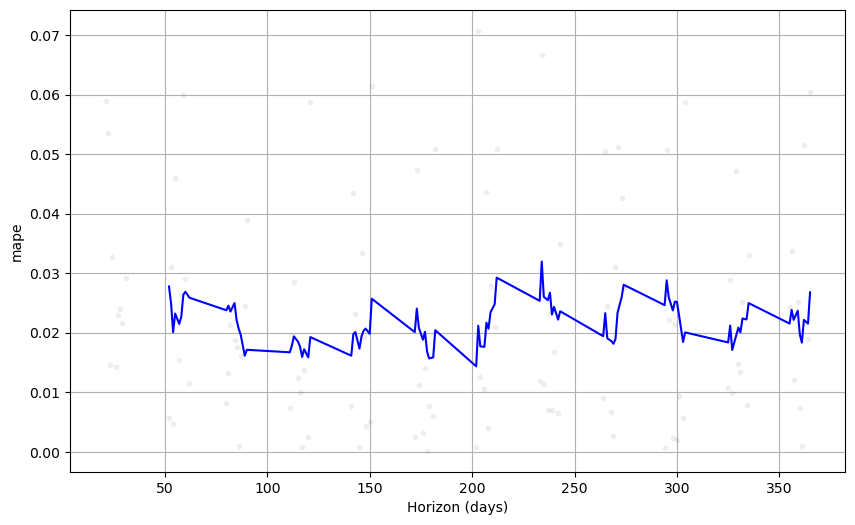

In [134]:
#performance_metrics(df_cv)
plot_cross_validation_metric(df_cv,metric='mape')

In [135]:
#####################################################
#Prophet Trend
#####################################################

In [137]:
df = pd.read_csv('HospitalityEmployees.csv')

In [139]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

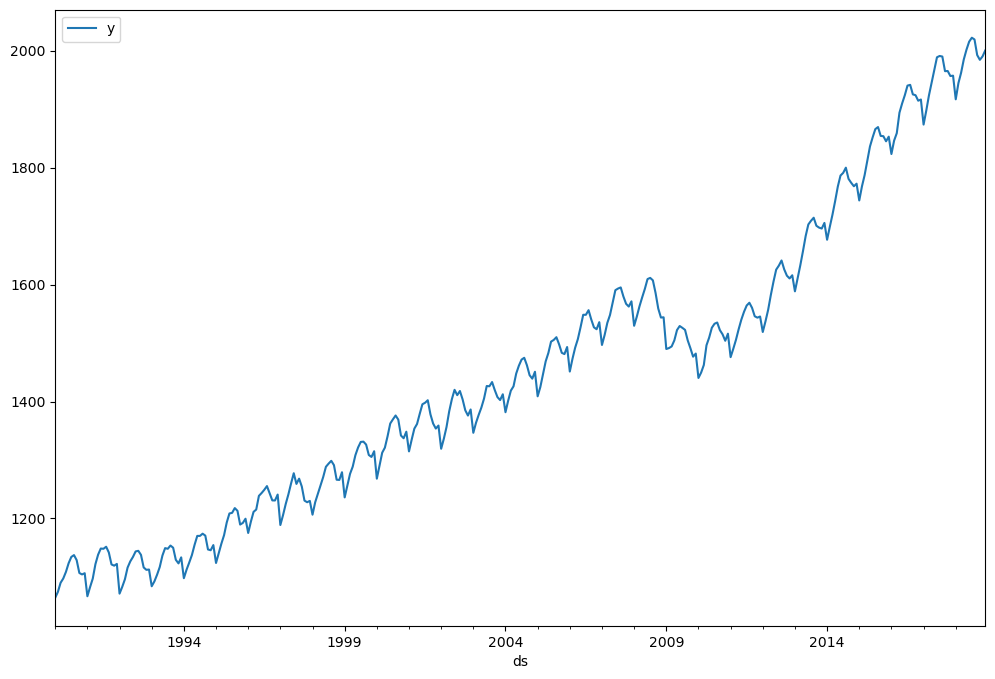

In [142]:
df.plot(x='ds',y='y',figsize=(12,8))
plt.show()

In [143]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

18:23:49 - cmdstanpy - INFO - Chain [1] start processing
18:23:49 - cmdstanpy - INFO - Chain [1] done processing


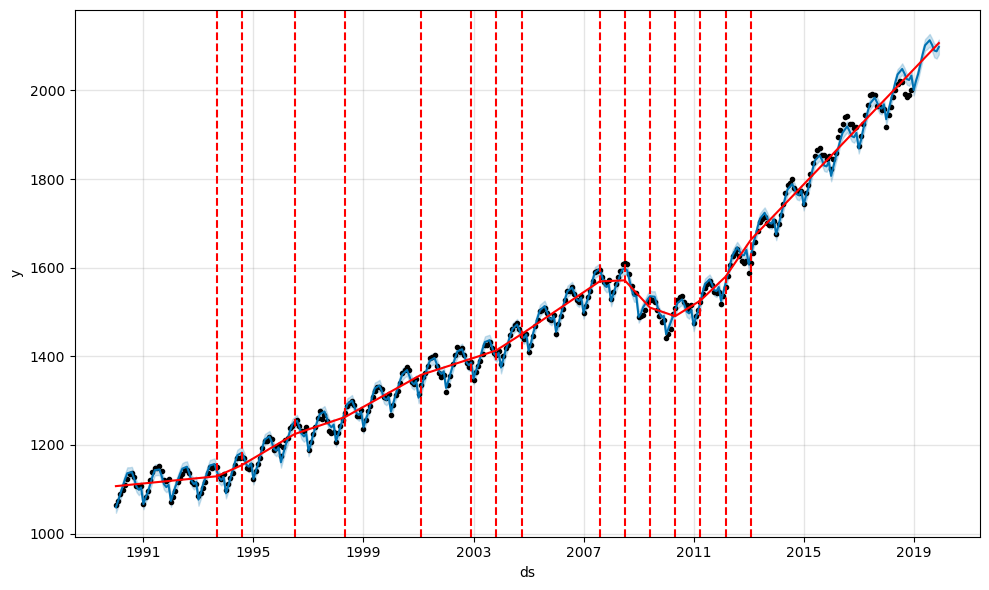

In [148]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)
plt.show()

In [149]:
#####################################################
#Prophet Seasonality
#####################################################

In [150]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [151]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

18:49:39 - cmdstanpy - INFO - Chain [1] start processing
18:49:39 - cmdstanpy - INFO - Chain [1] done processing


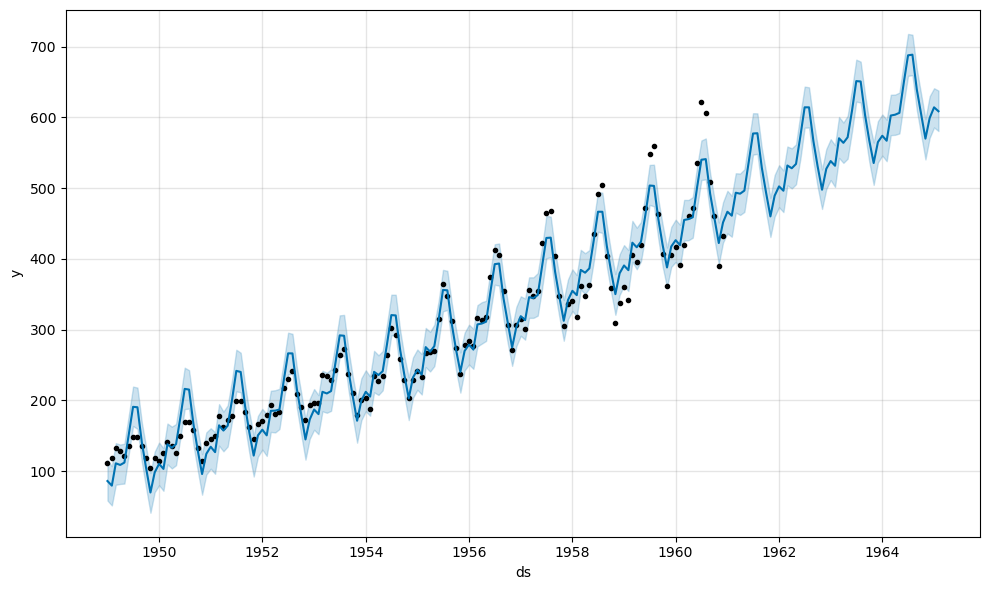

In [154]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

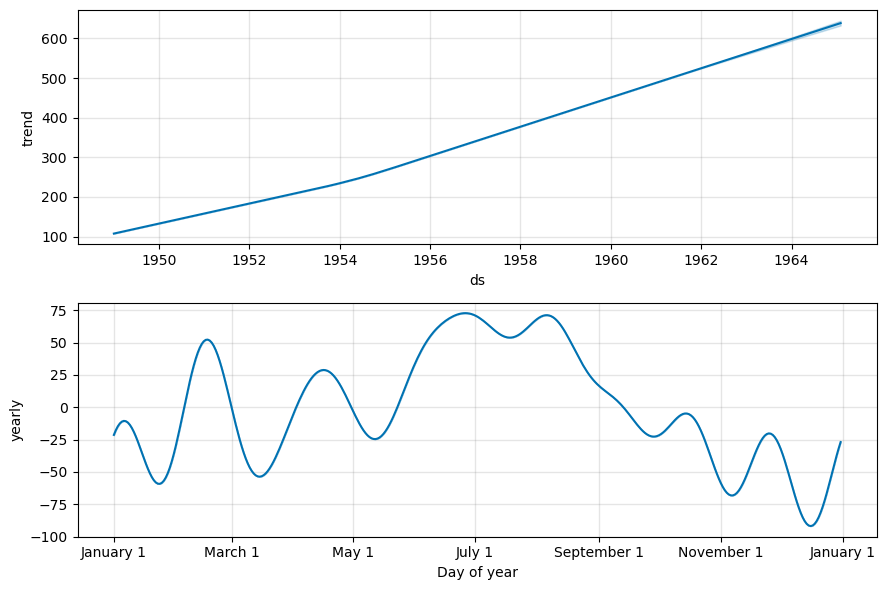

In [158]:
fig = m.plot_components(forecast)
plt.show();

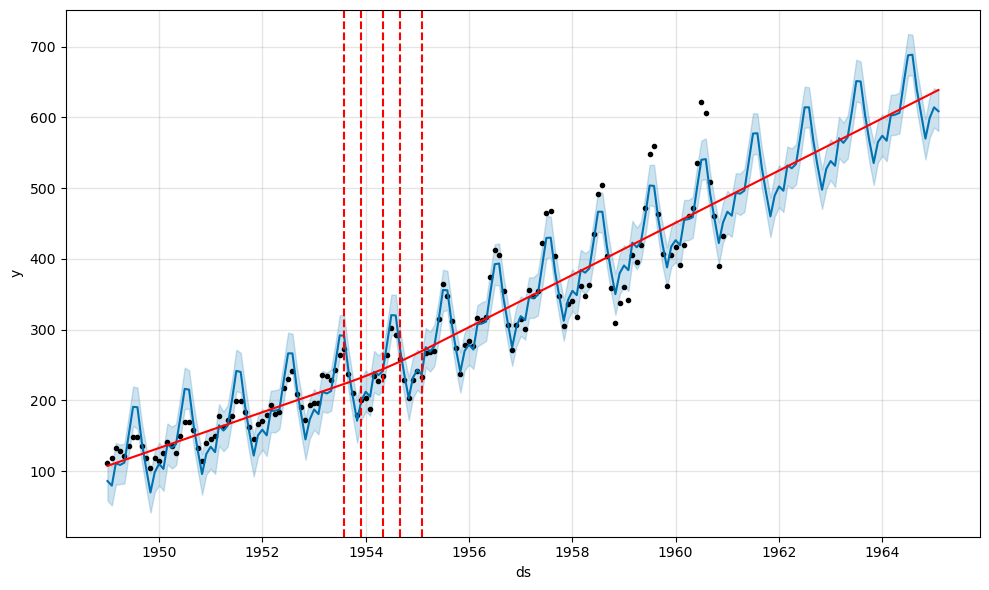

In [163]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)
plt.show()

18:53:22 - cmdstanpy - INFO - Chain [1] start processing
18:53:22 - cmdstanpy - INFO - Chain [1] done processing


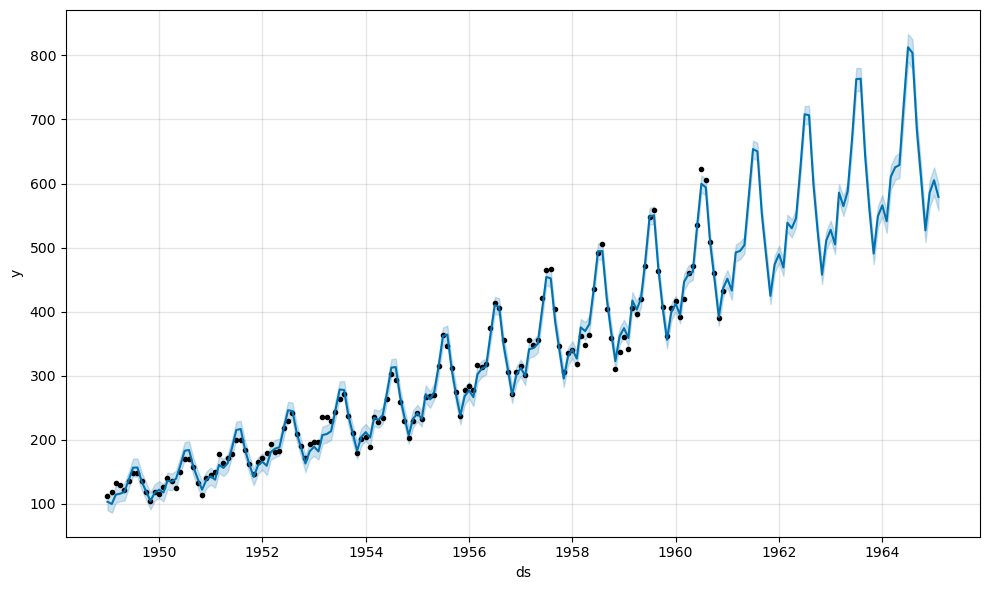

In [164]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

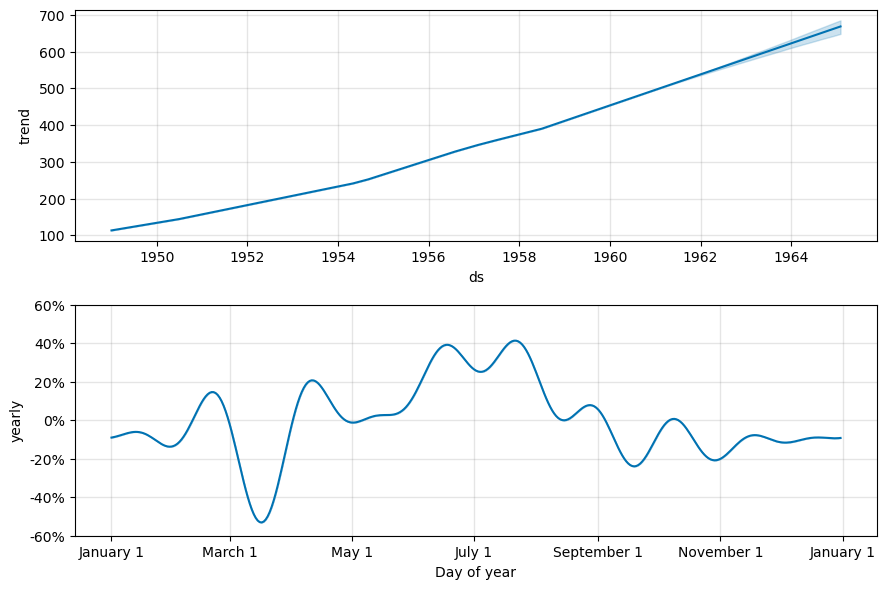

In [168]:
fig = m.plot_components(forecast)
plt.show()